## Pure Python K-Means

In this project, we will be doing in indepth mathematical treatment and implementation of the K-means algorithim. Similar to the project on K-medoids, we will utilize image compression as a movitvating example. First, we lay out some general mathematical underpinnnings of the K-means algorithim.

Given $m$ data points $\text x^i$, $i=1,\dots, m$, $K$-means clustering algorithm groups them into $k$ clusters by minimizing the distortion function over $\{ r^{ij}, \mu^j \}$

$$J=\sum_{i=1}^m\sum_{j=1}^k r^{ij} \|\text x^i-\mu^j\|^2,$$

where $r^{ij}=1$ if $\text x^i$ belongs to the $j$-th cluster and $r^{ij}=0$ otherwise.


Using the squared Euclidean distance $\|\text x^i-\mu^j\|^2$ as the dissimilarity function and minimizing the distortion function, we will have 

$$\mu^j=\frac{\sum_i r^{ij} \text x^i}{\sum_i r^{ij}}.$$

That is, $\mu^j$ is the center of $j$-th cluster.


Given the above definitions, we demonstrate the squared Euclidean distance matrix equivalent representation:

$$d^2_{ij} = \|\text x^i-\mu^j\|^2 = (x_i - \mu_j)^T(x_i - \mu_j) = x_i^T x_i - 2\mu_j^T x_i + \mu_j^T\mu_j $$

Reformatting our equation we have:

$$J=\sum_{i=1}^m\sum_{j=1}^k r^{ij} (x_i^T x_i - 2\mu_j^T x_i + \mu_j^T\mu_j^2)$$

In order to minimize the distortion function, first we must take the partial derivative of $J$ with respect to $\mu_j$, and then set the function equal to zero, and finally solve for $\mu_j$

$$\frac{dJ}{d\mu_j} = \sum_{i=1}^m r^{ij}(-2x_i +2\mu_j) =\sum_{i=1}^m -2r^{ij}x_i + 2r^{ij}\mu_j = -2 \sum_{i=1}^m r^{ij}x_i + 2\sum_{i=1}^m r^{ij}\mu_j=0$$

Begin solving by rearranging terms, simplifying, and factoring both sides to isolate $\mu_j$ we are left with the solution:

$$\frac{\sum_{i=1}^m r^{ij}x_i}{\sum_{i=1}^m r^{ij}} = \mu_j$$

This above solution is consistent with the expected solution

Now suppose we replace the similarity function (the squared $\ell_2$ distance here: $\|\text x^i-\mu^j\|^2$) by another distance measure, the quadratic distance (also known as the Mahalanobis distance) $d(x, y) = (\text x - y)^T \Sigma  (\text x - y)$, where the given weight matrix $\Sigma$ is symmetrical and positive definite (meaning that the corresponding $d(x, y) > 0$ when $x \neq y$). 

Prove that the centroid in this case will be the same as the following:

$$\mu^j=\frac{\sum_i r^{ij} \text x^i}{\sum_i r^{ij}}.$$

Given the above definition of Mahalanobis distance such that $\Sigma$ represents an inverse co-variance matrix we replace the Euclidean distance function (or similarity function) as follows:

$$J=\sum_{i=1}^m\sum_{j=1}^k r^{ij}[(x_i-\mu_j)^T \Sigma (x_i -\mu_j)] $$

In order to minimize the distortion function, first we must take the partial derivative of $J$ with respect to $\mu_j$ via application of the multivariate calculus rule that the derivative of $z^T \Sigma z$ with respect to $z$ is given by $2\Sigma z$ where $z=(x_i-\mu_j)$, then setting the function equal to zero, and finally solve for $\mu_j$

$$\frac{dJ}{d\mu_j} = \sum_{i=1}^m r^{ij'}(2\Sigma \mu_j - 2\Sigma x_i) = 2\sum_{i=1}^m r^{ij'}\Sigma \mu_j - 2\sum_{i=1}^m r^{ij'}\Sigma x_i= 0$$

Begin solving by rearranging terms and factoring both sides to isolate $\mu_j$ our sigma terms cancel and we are left with the solution:

$$\frac{\sum_{i=1}^m r^{ij}x_i}{\sum_{i=1}^m r^{ij}} = \mu_j$$

Given the change in our similarity function, the assignment function $r^{ij}$ must be updated as well. Previously, the assignment function under Euclidean distance was as follows:

$$r^{ij} = \begin{cases} 1 & \quad \text{if  $k= argmin_j(\|x_i- \mu_j \|^2)$}   \\ 0 & \quad\text{Otherwise}   \end{cases}$$

Updating the assignment function to assign a given point to the correct $k^{th}$ cluster with minimum dis-similarity under Mahalanobis Distance as our similarity function we have:

$$r^{ij} = \begin{cases} 1 & \quad \text{if  $k= argmin_j (x_i-\mu_j)^T \Sigma (x_i - \mu_j) $}   \\ 0 & \quad\text{Otherwise}   \end{cases}$$

---

## Proof of K-means Local Optimality in Finite Steps


To prove that the K-means algorithm reaches a local minimum in finite steps (iterations) under squared Euclidean distance given a particular initialization, it can be demonstrated that the loss functions for both the assignment and refitting steps of the algorithm decrease strictly monotonically in each iteration until such a point where the strict condition is broken in which case the algorithm halts and reaches convergence. The nature of both of these functional attributes in the minimization of the objective function assure that k-means will reduce distance at each iteration which makes previous initialization impossible to revisit until such a point where there are no incremental changes where it is said to have converged on the local minimum.  These functions are proven monotonic decreasing via the properties of Squared Euclidean Distance which is itself a monotonically decreasing function in the context of its minimization within each iteration. Furthermore, the case where strict monotonic decreasing is not met we halt the program at a given iteration and accept the output as a sub-optimal solution obtained from a local minimum within the global problem solution space, but a global solution of the problem given our particular initialization conditions.

---

## Implementing K-means

My implementation of the K Means algorithm is written in python and is located within this repository under the name "custom_k_means.py". 

## Initialization:

As with the previous K Medoids implementation, this K Means implementation allows the user to choose between two initialization options random and manually specified centers. The mechanics and functions responsible for carrying out the operations are identical for both modules. There is a similar error feedback feature which makes certain that the shape of the manually input array matches with the chosen value of k and input array shapes.

## Distance:

The only major difference between the two algorithms is the removal of the greedy approach to new inter-cluster centroid selection. Instead, k means takes the average of all points within a given cluster and assigns the resulting average as the cluster's new center. This operation is far less computationally expensive and guarantees that we will reach convergence. However, this method of averaging does come at the cost of precision. Within the k medoids framework, we are selecting actual points within a cluster as the new centers, thus preserving all the original data. Alternatively, in K means, by taking the average we will likely end up with a point that is not actually present in the original data and working with RGB integer values requires this output to be rounded further lowering precision. Additionally, the averaging operation is particularly more prone to ignoring outliers making the k medoids method an obviously more robust approach. This implementation of K Means only offers a distance argument of Euclidian (squared) as other metrics do not share the same unique properties that make Euclidian (squared) distance ideal for K Means implementation.

## Halting:

It is notable that the K Means approach is far more efficient computationally and can be run in a vastly smaller amount of time while (at least in the tested images) we retain a similar level of output quality. Of additional note is the lack of inclusion of the optional arguments for halting methods found in the K Medoids implementation. Down-sampling is no longer included as an option as it would not be relevant to K Means as we average to resolve centers instead of testing individual cluster centroids for best fit. The percentage change in distance metric halting option is not included because k-means under the Euclidian distance metric is guaranteed to converge in finite steps, and given the rounding involved in converting averages back to proper RGB spectrum equivalents, this algorithm will converge reasonably fast without the need to halt early. Thus the only method responsible for potential early halting for the algorithm other than its natural halting point is the specification by the user of a maximum number of iterations to perform.

## Debugging:

Additionally of note, is the more barebones approach to this k-means algorithm which opts not to carry incremental distance, cluster centers, and labels as to achieve more memory and computational efficiency. Despite these cuts, the function still yields all necessary output metrics including final distance, labels, centroids, and iteration counts. The K Means implementation also sheds text output features and additional image display options (previously present in K Medoids) outside of the initial, first, and final images, which are always displayed as output.

The below code cell imports the custom module created to run the K Means algorithm as well as other necessary dependencies.

In [2]:
import custom_k_means as km
import time
import numpy as np
from PIL import Image
import os,sys,platform
import matplotlib.pyplot as plt
import pandas as pd
import warnings

## K Means Results:

Each is labeled according to its properties and printed output below it. Each output cell contains the initial image used, the first assignment based on random centers, the final image, and the final iterations required to converge in printed text output. In running each of these examples and comparing them back to the K Medoids algorithm a couple of things are immediately apparent. Firstly, K Means is by far the faster of the two, which allows it to iterate fully in most cases without the computational ceiling that plagues K Medoids. On the other hand, K Medoids is far more robust to outliers and initial conditions that K Means. Overall, both algorithms do reasonably good jobs at compression with a reasonably high k value (above 13 for most images based on my testing) and with ample time to iterate. However, neither of these two algorithms are anyone’s first choice for image compression given many better modern alternatives to either approach. Despite this, it is interesting to note the wide range of applications un-supervised learning models can take on many of which are often unconventional applications that we don't typically associate with clustering.

### K-Means on the Football Image with k=3:

------ Initial Image -------


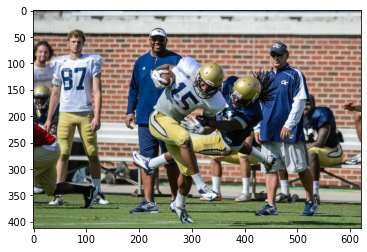

------- Image Based on Random Centers and Assignment  -------


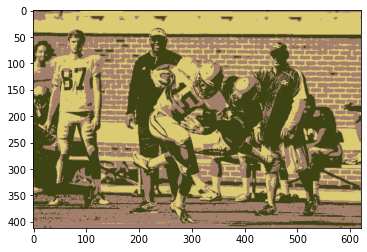

------The K-Means Algorithim has reached convergence halted during iteration 8 ------


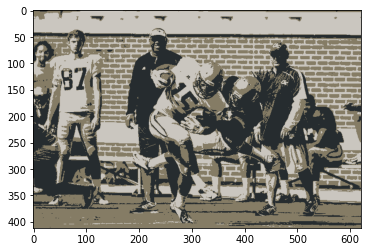

Total Runtime = 1.53 Seconds


In [3]:
start_time_k2_fb = time.time()
iteration_mean1 ,labels_k2_fb = km.K_means('football.bmp',k=3,iter_max=500,distance='ecludian',sweeping_k=False)
end_time_k2_fb = time.time()
total_time_k2_fb = round(end_time_k2_fb - start_time_k2_fb,2)
print('Total Runtime = %s Seconds' % total_time_k2_fb)

### K-Means on the Football Image with k=16:

------ Initial Image -------


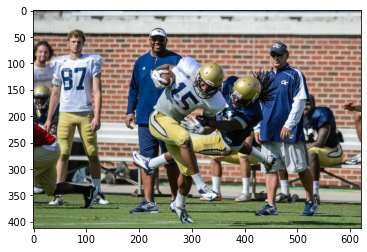

------- Image Based on Random Centers and Assignment  -------


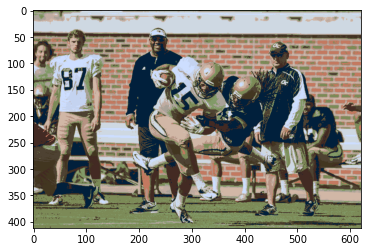

------The K-Means Algorithim has reached convergence halted during iteration 74 ------


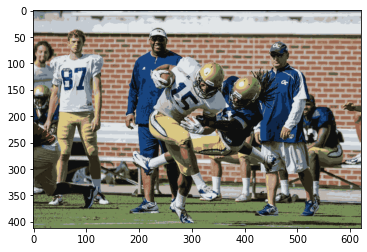

Total Runtime = 12.02 Seconds


In [4]:
start_time_k16_fb = time.time()
iteration_mean2 , labels_k16_fb = km.K_means('football.bmp',k=16,iter_max=500,distance='ecludian',sweeping_k=False)
end_time_k16_fb = time.time()
total_time_k16_fb = round(end_time_k16_fb - start_time_k16_fb,2)
print('Total Runtime = %s Seconds' % total_time_k16_fb)

### K-Means on the Football Image with k=32:

------ Initial Image -------


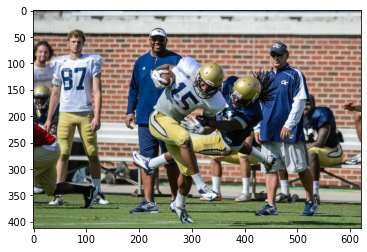

------- Image Based on Random Centers and Assignment  -------


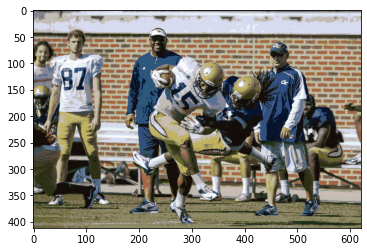

------The K-Means Algorithim has reached convergence halted during iteration 32 ------


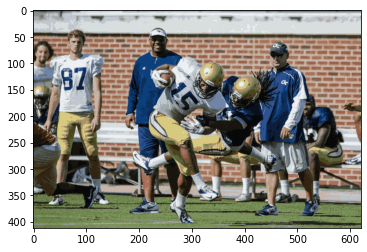

Total Runtime = 9.16 Seconds


In [5]:
start_time_k32_fb = time.time()
iteration_mean3, labels_k32_fb = km.K_means('football.bmp',k=32,iter_max=500,distance='ecludian',sweeping_k=False)
end_time_k32_fb = time.time()
total_time_k32_fb = round(end_time_k32_fb - start_time_k32_fb,2)
print('Total Runtime = %s Seconds' % total_time_k32_fb)

### K-Means on the Beach Image with k=2:

------ Initial Image -------


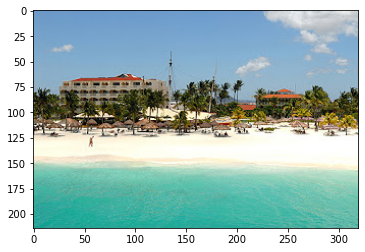

------- Image Based on Random Centers and Assignment  -------


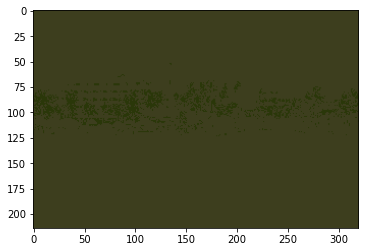

------The K-Means Algorithim has reached convergence halted during iteration 5 ------


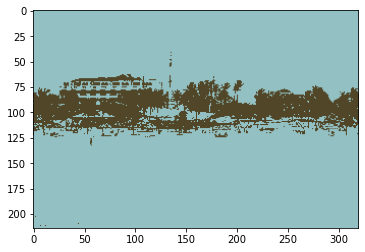

Total Runtime = 0.6 Seconds


In [6]:
start_time_k2_beach = time.time()
iteration_mean4, labels_k2_beach = km.K_means('beach.bmp',k=2,iter_max=500,distance='ecludian',sweeping_k=False)
end_time_k2_beach = time.time()
total_time_k2_beach = round(end_time_k2_beach - start_time_k2_beach,2)
print('Total Runtime = %s Seconds' % total_time_k2_beach)

### K-Means on the Beach Image with k=16:

------ Initial Image -------


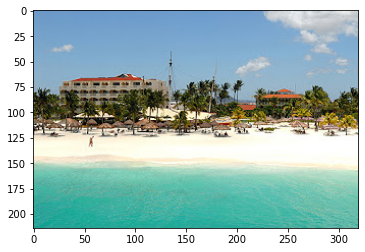

------- Image Based on Random Centers and Assignment  -------


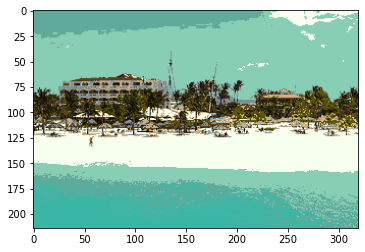

------The K-Means Algorithim has reached convergence halted during iteration 42 ------


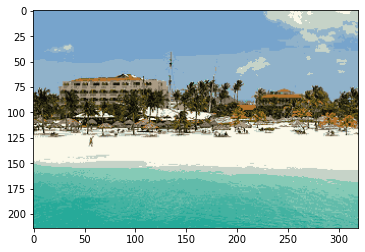

Total Runtime = 2.23 Seconds


In [7]:
start_time_k16_beach = time.time()
literation_mean5, labels_k16_beach = km.K_means('beach.bmp',k=16,iter_max=500,distance='ecludian',sweeping_k=False)
end_time_k16_beach = time.time()
total_time_k16_beach = round(end_time_k16_beach - start_time_k16_beach,2)
print('Total Runtime = %s Seconds' % total_time_k16_beach)

### K-Means on the Beach Image with k=32:

------ Initial Image -------


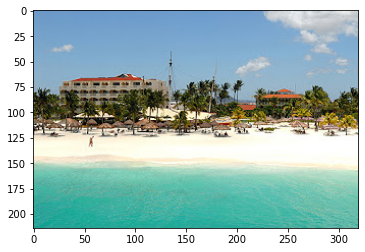

------- Image Based on Random Centers and Assignment  -------


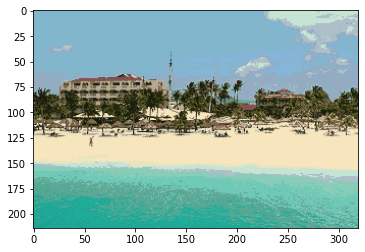

------The K-Means Algorithim has reached convergence halted during iteration 27 ------


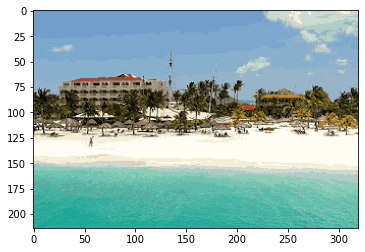

Total Runtime = 2.45 Seconds


In [8]:
start_time_k32_beach = time.time()
iteration_mean6, labels_k32_beach = km.K_means('beach.bmp',k=32,iter_max=500,distance='ecludian',sweeping_k=False)
end_time_k32_beach = time.time()
total_time_k32_beach = round(end_time_k32_beach - start_time_k32_beach,2)
print('Total Runtime = %s Seconds' % total_time_k32_beach)

### K-Means on the Fries Image with k=2:

------ Initial Image -------


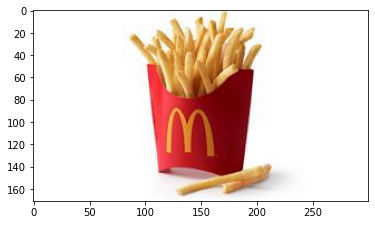

------- Image Based on Random Centers and Assignment  -------


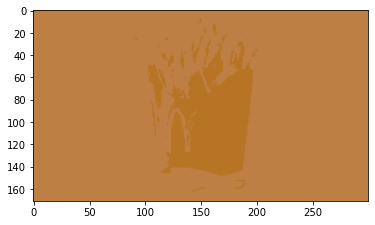

------The K-Means Algorithim has reached convergence halted during iteration 5 ------


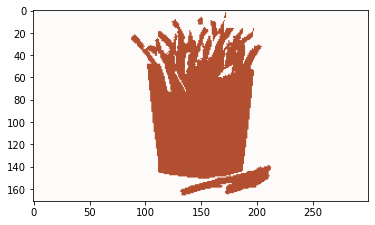

Total Runtime = 0.5 Seconds


In [9]:
start_time_k2_fries = time.time()
iteration_mean7, labels_k2_fries = km.K_means('fries.jpg',k=2,iter_max=500,distance='ecludian',sweeping_k=False)
end_time_k2_fries = time.time()
total_time_k2_fries = round(end_time_k2_fries - start_time_k2_fries,2)
print('Total Runtime = %s Seconds' % total_time_k2_fries)

### K-Means on the Fries Image with k=16:

------ Initial Image -------


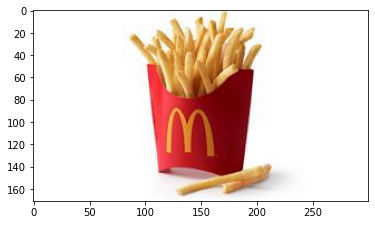

------- Image Based on Random Centers and Assignment  -------


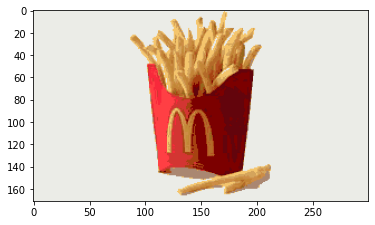

------The K-Means Algorithim has reached convergence halted during iteration 37 ------


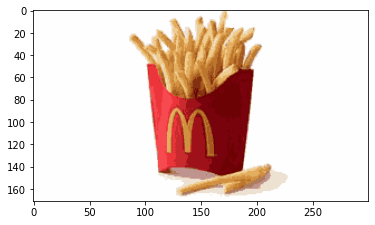

Total Runtime = 1.58 Seconds


In [10]:
start_time_k16_fries = time.time()
iteration_mean8, labels_k16_fries = km.K_means('fries.jpg',k=16,iter_max=500,distance='ecludian',sweeping_k=False)
end_time_k16_fries = time.time()
total_time_k16_fries = round(end_time_k16_fries - start_time_k16_fries,2)
print('Total Runtime = %s Seconds' % total_time_k16_fries)

### K-Means on the Fries Image with k=32:

------ Initial Image -------


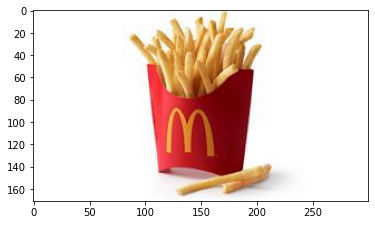

------- Image Based on Random Centers and Assignment  -------


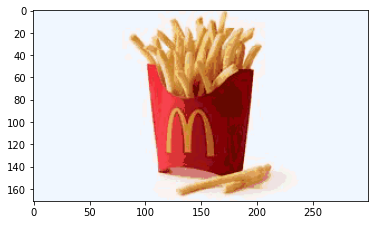

------The K-Means Algorithim has reached convergence halted during iteration 45 ------


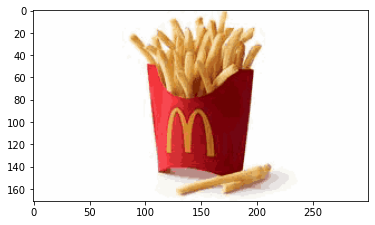

Total Runtime = 2.81 Seconds


In [11]:
start_time_k32_fries = time.time()
iteration_mean9, labels_k32_fries = km.K_means('fries.jpg',k=32,iter_max=500,distance='ecludian',sweeping_k=False)
end_time_k32_fries = time.time()
total_time_k32_fries = round(end_time_k32_fries - start_time_k32_fries,2)
print('Total Runtime = %s Seconds' % total_time_k32_fries)

### K-Means on Poorly Specified Cluster Centers:

------ Initial Image -------


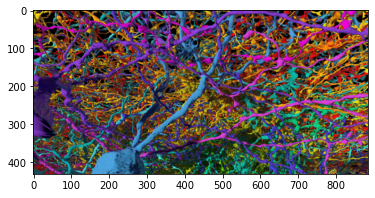

------- Image Based on Random Centers and Assignment  -------


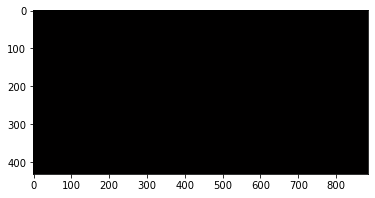

------The K-Means Algorithim has reached convergence halted during iteration 64 ------


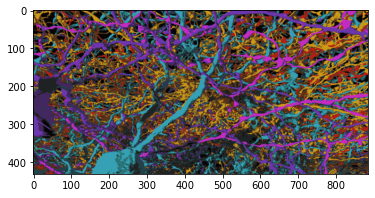

Total Runtime = 12.82 Seconds


In [12]:
man_centers = np.array([[1,0,0],[1,0,0],[1,0,0],[1,0,0],[1,0,0],[1,0,0],[1,0,0],[1,0,0],[1,0,0],[1,0,0],[1,0,0],[1,0,0]])
start_time_man_cp = time.time()
iteration_mean10, labels_man_cp = km.K_means('complex_image.png',k=12,iter_max=500,distance='ecludian',sweeping_k=False,man_input=True,input_array=man_centers)
end_time_man_cp = time.time()
total_time_man_cp = round(end_time_man_cp - start_time_man_cp,2)
print('Total Runtime = %s Seconds' % total_time_man_cp)

### K-Means on Random Cluster Centers:

------ Initial Image -------


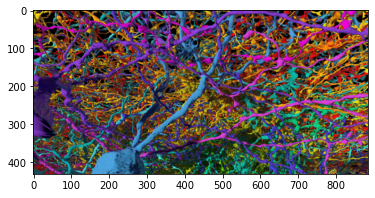

------- Image Based on Random Centers and Assignment  -------


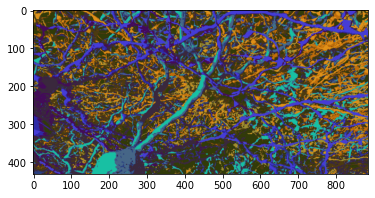

------The K-Means Algorithim has reached convergence halted during iteration 14 ------


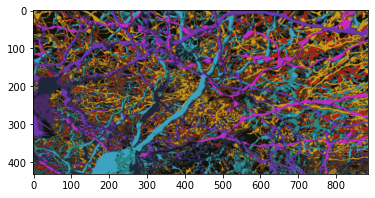

Total Runtime = 3.89 Seconds


In [13]:
start_time_rand_cp = time.time()
iteration_mean11, labels_rand_cp = km.K_means('complex_image.png',k=12,iter_max=500,distance='ecludian',sweeping_k=False)
end_time_rand_cp = time.time()
total_time_rand_cp = round(end_time_rand_cp- start_time_rand_cp,2)
print('Total Runtime = %s Seconds' % total_time_rand_cp)

### K-Means on Reasonably Good Specified Cluster Centers:

------ Initial Image -------


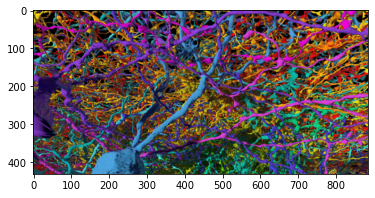

------- Image Based on Random Centers and Assignment  -------


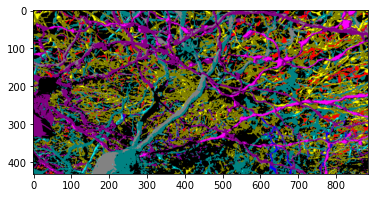

------The K-Means Algorithim has reached convergence halted during iteration 17 ------


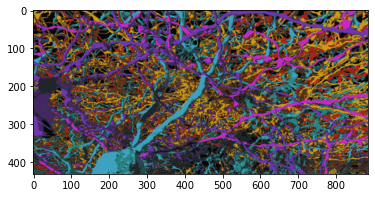

Total Runtime = 4.47 Seconds


In [14]:
good_man_centers = np.array([[0,0,0],[255,255,255],[255,0,0],[0,255,0],[0,0,255],[255,255,0],[255,0,255],[0,255,255],[130,130,130],[130,0,130],[130,130,0],[0,130,130]])
start_time_man_gman = time.time()
iteration_mean_gman, labels_man_gman = km.K_means('complex_image.png',k=12,iter_max=500,distance='ecludian',sweeping_k=False,man_input=True,input_array=good_man_centers)
end_time_man_gman = time.time()
total_time_man_gman = round(end_time_man_gman - start_time_man_gman,2)
print('Total Runtime = %s Seconds' % total_time_man_gman)

### Further Discussion:
Again, we can see that the choice of initial centers can impact the overall result. In these three cases we can see that they generally come up with the same output image. However, it is notable that the poor initial assignment run of the algorithm required the most time and number of iterations. The random assignment can in second as far as speed and efficiency just behind the poor assignment initialization. However, the good initialization where very distant centers were purposefully chosen by far outperforms both other methods of initialization cutting run time and iterations by more than half. This demonstrates the strong importance on beginning with good centers when running this algorithm. Ideally to make this mathematically consistent regardless of input data one could use dataset type dependent variance metrics and statistics to determine suitably divergent ideal initial centers for the algorithm that would be robust and perform well regardless of input data types. Given we are working with image data I simply chose points I knew would leave wide enough room and separability while covering as much of the color spectrum as possible.

### K Parameter Tuning using K Means on the Beach Image with Euclidian Squared Distance
Below I have implemented another function that sweeps over various values for k until convergence then reports each k-values respective final total inter-cluster distance, run-time, and iterations required to converge. For the large range of k chosen some computation time concerns caused me to specific the max number of iterations to 50 which as apparent in the charts below was a choice that limits the data's total utility. Due to these practicalities, the distance metric for each given k will not be guaranteed to be even a local minimum as the whole solution space for each cluster center was not searched. Also, the values of distance iteration to consecutive iteration must have decreased by specified thresholds (shown in the collapsed code cell below) which confound results in distance, runtime, and number of iterations until convergence. With these warnings in mind the data still provides some interesting information in the form of a generalized elbow plot, and some of the general behavior of the algorithm. The runtime graph is particularly interesting as it appears to scale linearly with k. This observation may be invalidated however if the max iterations were allowed free range.  

In [15]:
k_distance_list,times_list,k_indexes,number_of_iterations_required = km.sweep_k_values('beach.bmp',iter_max=50,start_k=2,end_k=200,distance='ecludian',show_images=False)

### Plot of The Euclidian Distance for Varying Values of K

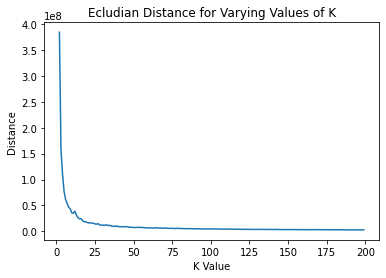

In [16]:
df_distances =pd.DataFrame(k_distance_list,index=k_indexes,columns=['Distance'])
plt.plot(df_distances)
plt.xlabel('K Value')
plt.ylabel('Distance')
plt.title('Ecludian Distance for Varying Values of K')
plt.show()

### Plot of The Number of Iterations Prior to Halting with Euclidian Distance

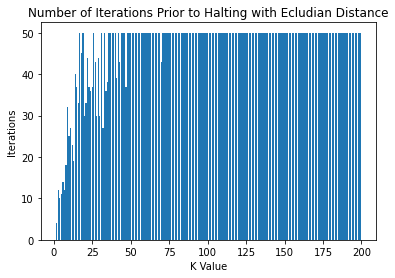

In [17]:
plt.bar(k_indexes,number_of_iterations_required)
plt.title('Number of Iterations Prior to Halting with Ecludian Distance')
plt.ylabel('Iterations')
plt.xlabel('K Value')
plt.show()

### Plot of The Time in Seconds Prior to Halting for Varying K With Euclidian Distance

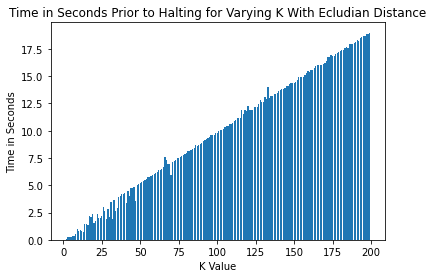

In [18]:
plt.bar(k_indexes,times_list)
plt.title('Time in Seconds Prior to Halting for Varying K With Ecludian Distance')
plt.ylabel('Time in Seconds')
plt.xlabel('K Value')
plt.show()

## Additional Documentation
- Module/Package Call: km
- Primary Function: km.K_means()
- Required Arguments:
 - initial_image_path: the location of your test image of choice as a string
 - k: the desired number of clusters for the algorithm to solve for
- Optional Arguments:
 - iter_max: the number of maximum iterations to perform on a given run this argument takes an integer as input and defaults to 500 if no argument is given
 - distance: takes a string in the form of 'Euclidian' (for squared Euclidian distance) or 'Manhattan' for L1 norm as the distance function used argument default is Euclidian
 - sweeping_k: default value of false suppresses intermediate images and extra output such as final distance, final centroids, and final iterations count. Used when calling the sweep_k function which finds a tuning value of k over a range of k’s specified
 - man_input: defaults to False allows user to input manual initial centers if specified as True
 - input_array: defaults to None allow user to input manual initial centers if man_input is True and a NumPy array is supplied matching the provided k values if not error is returned
- Output:
 - Final Centroids as NumPy array
 - Final Labels as NumPy array
